In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_51380_Z')

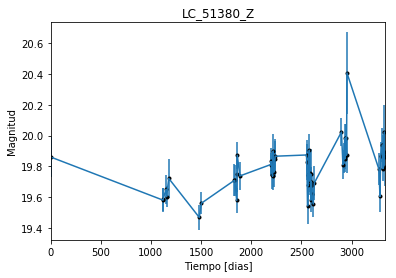

In [2]:
data = np.genfromtxt('LC_51380_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_51380_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

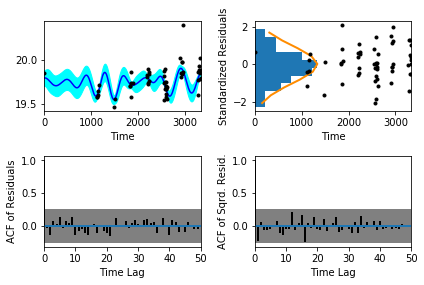

In [5]:
sample.assess_fit()

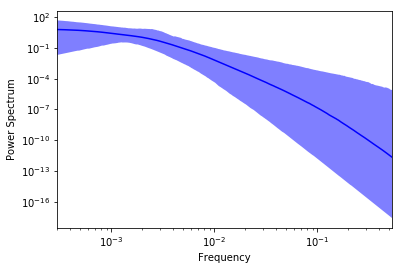

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_51380_Z')

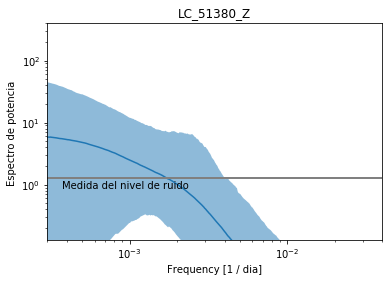

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_51380_Z')

Text(0.5,1,'Prediccion , valor esperado LC_51380_Z')

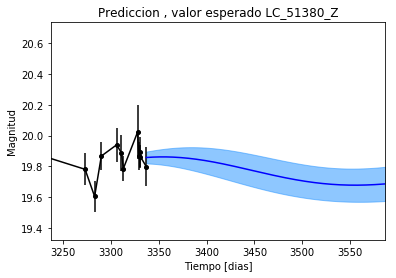

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_51380_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_51380_Z')

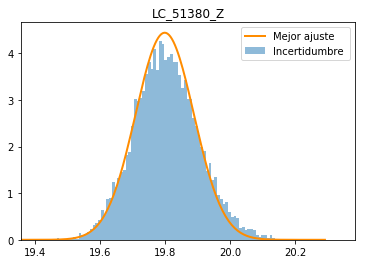

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_51380_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_51380_Z')

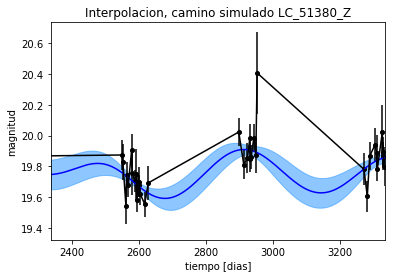

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51380_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_51380_Z')

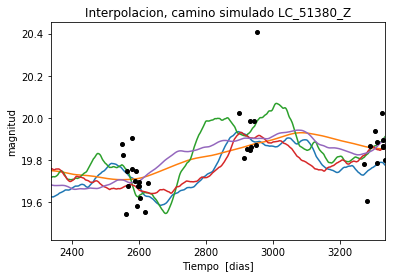

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51380_Z')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 373.877765493
Median: 0.00822285918691
Standard deviation: 0.199151807871
68% credibility interval: [ 0.00068766  0.17613988]
95% credibility interval: [  3.40507001e-04   7.97775523e-01]
99% credibility interval: [  3.06618229e-04   9.95450497e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 592.506335977
Median: 0.00192728218389
Standard deviation: 0.0917095797045
68% credibility interval: [ 0.00049053  0.02466723]
95% credibility interval: [  3.20562793e-04   3.26501190e-01]
99% credibility interval: [  3.03357479e-04   7.10201919e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 635.015764064
Median: 0.017118637699

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1688.90168107
Median: 73.8461773306
Standard deviation: 1.57090635683
68% credibility interval: [ 72.02803508  74.93924183]
95% credibility interval: [ 69.6679806   75.60614747]
99% credibility interval: [ 67.60838407  76.12617207]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 549.008170707
Median: 0.503444662914
Standard deviation: 2.20403972719
68% credibility interval: [ 0.05189008  3.64190417]
95% credibility interval: [ 0.0140906   7.53133923]
99% credibility interval: [  1.02274413e-02   1.02855475e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 517.416505055
Median: 0.233675207627
Standard deviation: 9.90801354306
68% credibility interval: [  4.65661656e-03   8.24298261e+00]
95% credibility interv

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10903.960506
Median: 1.13214552447e-21
Standard deviation: 8.21532318e+111
68% credibility interval: [  1.16477652e-77   1.25489818e+09]
95% credibility interval: [  9.19361651e-121   1.14979855e+075]
99% credibility interval: [  1.90252429e-135   6.39428855e+089]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2950.0444703
Median: 19.7429427483
Standard deviation: 0.0701284977762
68% credibility interval: [ 19.68680259  19.80242761]
95% credibility interval: [ 19.61210483  19.89189601]
99% credibility interval: [ 19.53657811  19.98306862]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 604.204963539
Median: 0.00386422465977
Standard deviation: 0.253021093469
68% credibility interval: [ 0.          0.33951467]
95% credibility interval: [ 0.          0.91998174]
99% credibility interval: [ 0.          1.04022095]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 604.204963539
Median: 0.00386422465977
Standard deviation: 0.253021093469
68% credibility interval: [ 0.          0.33951467]
95% credibility interval: [ 0.          0.91998174]
99% credibility interval: [ 0.          1.04022095]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 386.434365846
Median: 0.0
Standard deviation: 0.000905471118549
68% 

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1688.90168107
Median: 73.8461773306
Standard deviation: 1.57090635683
68% credibility interval: [ 72.02803508  74.93924183]
95% credibility interval: [ 69.6679806   75.60614747]
99% credibility interval: [ 67.60838407  76.12617207]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2300.52686405
Median: 0.0187435299363
Standard deviation: 0.0239248388433
68% credibility interval: [ 0.01009969  0.03695622]
95% credibility interval: [ 0.00615261  0.07860168]
99% credibility interval: [ 0.00443005  0.15609579]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2247.76120818
Median: 0.920870434499
Standard deviation: 0.139251491499
68% credibility interval: [ 0.79754114  1.06841482]
95% credibility interval: [ 0.69556122  1.24285561]
99% credibility interval: [ 0.63930472  1.37569156]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 424.508202847
Median: 6.14477777707e-05
Standard deviation: 0.204699205253
68% credibility interval: [  1.52194489e-13   5.67113777e-03]
95% credibility interval: [  3.26731085e-80   3.03979491e-01]
99% credibility interval: [  7.26707197e-94   1.48798968e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 373.877765493
Median: (-0.0516657480262-0.0459604888102j)
Standard deviation: 2.02315753408
68% credibility interval: [-1.10671951-0.06997791j -0.00432071-0.15983472j]
95% credibility interval: [ -5.01257145e+00-0.14694884j  -2.13946859e-03-0.00158956j]
99% credibility interval: [ -6.25459994e+00+0.j          -1.92653915e-03-0.01596329j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 592.506335977
Median: (-0.0121094711006+0.00630945691607j)
Standard deviation: 1.69098623584
68% credibility interval: [-0.15498876+0.43923271j -0.00308207+0.00580308j]
95% credibility interval: [ -2.05146748e+00+4.0589268j   -2.01415543e-03+0.02220096j]
99% credibility interval: [ -4.46233026e+00+5.12785247j  -1.90605125e-03+6.62098768j]